In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder


In [2]:
df = pd.read_csv("E:\\dekstop moved ap\\Data set\\marketing data\\Marketing Campaign data.csv")

In [3]:
df.drop(columns=['CUST_ID' , 'COMMENTS'] , inplace= True)

In [4]:
df.head()

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,F,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,1,0,0
1,M,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,1,0
2,F,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0
3,M,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,1,0,0
4,M,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,1,0,0


1.	Data understanding					 		 

•Produce a meta data table to show characteristics of each attribute.
The Meta data table should contain attribute name, descriptions, Maximum, Minimum, Mean, Std. Deviation. and histogram for numeric data, and mode and bar chart for nominal data 


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CUST_GENDER              1500 non-null   object
 1   AGE                      1500 non-null   int64 
 2   CUST_MARITAL_STATUS      1500 non-null   object
 3   COUNTRY_NAME             1500 non-null   object
 4   CUST_INCOME_LEVEL        1500 non-null   object
 5   EDUCATION                1500 non-null   object
 6   OCCUPATION               1500 non-null   object
 7   HOUSEHOLD_SIZE           1500 non-null   object
 8   YRS_RESIDENCE            1500 non-null   int64 
 9   AFFINITY_CARD            1500 non-null   int64 
 10  BULK_PACK_DISKETTES      1500 non-null   int64 
 11  FLAT_PANEL_MONITOR       1500 non-null   int64 
 12  HOME_THEATER_PACKAGE     1500 non-null   int64 
 13  BOOKKEEPING_APPLICATION  1500 non-null   int64 
 14  PRINTER_SUPPLIES         1500 non-null  

In [6]:
df.describe()

,AGE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
count,1500.000000,1500.000000,1500.000000,1500.0000,1500.000000,1500.000000,1500.000000,1500.0,1500.000000,1500.000000
mean,38.892000,4.088667,0.253333,0.6280,0.582000,0.575333,0.880667,1.0,0.286667,0.002000
std,13.636384,1.920919,0.435065,0.4835,0.493395,0.494457,0.324288,0.0,0.452355,0.044692
min,17.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,28.000000,3.000000,0.000000,0.0000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000
50%,37.000000,4.000000,0.000000,1.0000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000
75%,47.000000,5.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000
max,90.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


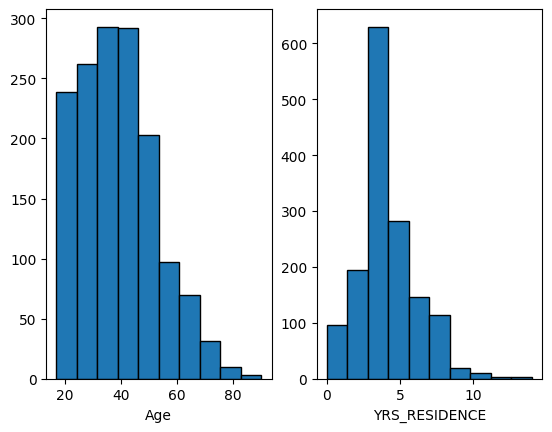

In [7]:
plt.subplot(1,2,1)
plt.hist(df['AGE'],edgecolor='black')
plt.xlabel('Age')

plt.subplot(1,2,2)
plt.hist(df['YRS_RESIDENCE'],edgecolor='black')
plt.xlabel('YRS_RESIDENCE')

plt.show()


In [8]:
df.mode()

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,M,34,Married,United States of America,"J: 190,000 - 249,999",HS-grad,Exec.,3,3,0,1,1,1,1,1,0,0


Text(0.5, 1.0, 'CUST_MARITAL_STATUS')

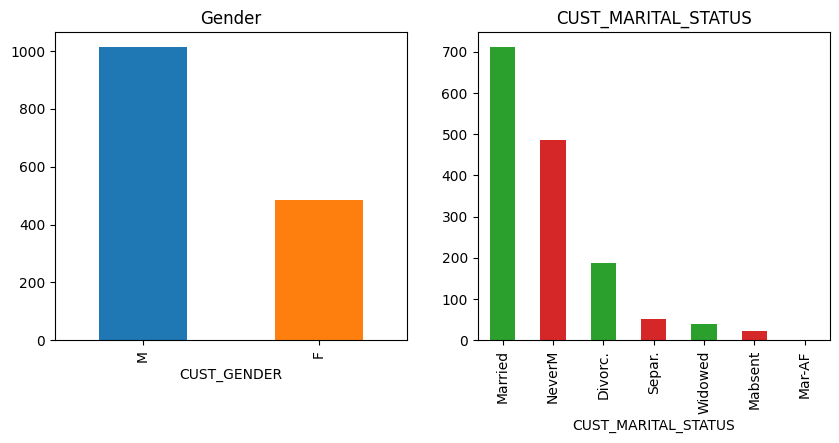

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);df['CUST_GENDER'].value_counts().plot(kind='bar' , color = ['C0' ,'C1']);plt.title('Gender')
plt.subplot(1,2,2);df['CUST_MARITAL_STATUS'].value_counts().plot(kind='bar' , color = ['C2' ,'C3']);plt.title('CUST_MARITAL_STATUS')

Text(0.5, 1.0, 'CUST_INCOME_LEVEL')

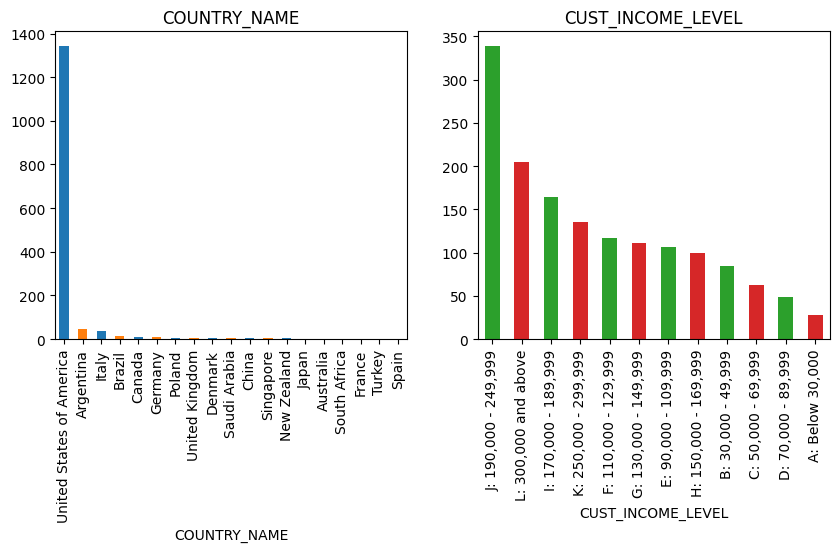

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);df['COUNTRY_NAME'].value_counts().plot(kind='bar' , color = ['C0' ,'C1']);plt.title('COUNTRY_NAME')
plt.subplot(1,2,2);df['CUST_INCOME_LEVEL'].value_counts().plot(kind='bar' , color = ['C2' ,'C3']);plt.title('CUST_INCOME_LEVEL')

Text(0.5, 1.0, 'OCCUPATION')

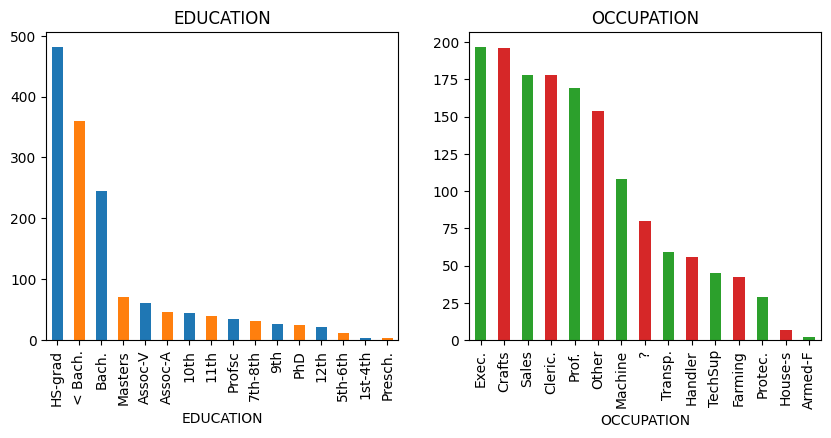

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);df['EDUCATION'].value_counts().plot(kind='bar' , color = ['C0' ,'C1']);plt.title('EDUCATION')
plt.subplot(1,2,2);df['OCCUPATION'].value_counts().plot(kind='bar' , color = ['C2' ,'C3']);plt.title('OCCUPATION')

•Describe missing or error data with suggestion of handling methods of each attribute. DO NOT clean them at this stage!
Missing data should include all types of missing data such as Null,
Blank, unknow etc. Error should include any invalid or mismatching data.


In [12]:
df.isnull().sum()

CUST_GENDER                0
AGE                        0
CUST_MARITAL_STATUS        0
COUNTRY_NAME               0
CUST_INCOME_LEVEL          0
EDUCATION                  0
OCCUPATION                 0
HOUSEHOLD_SIZE             0
YRS_RESIDENCE              0
AFFINITY_CARD              0
BULK_PACK_DISKETTES        0
FLAT_PANEL_MONITOR         0
HOME_THEATER_PACKAGE       0
BOOKKEEPING_APPLICATION    0
PRINTER_SUPPLIES           0
Y_BOX_GAMES                0
OS_DOC_SET_KANJI           0
dtype: int64

In [13]:
df[df['OCCUPATION']=='?'].shape

(80, 17)

Initially there isn't any missing values specifically , but the column occupation has some inapropriate value and we can replace this categorical values with mode. If the values are numerical we can fill it with mean or median

2.	Data preparation 	
						 
•Write Python programs to reduce variables with justifications and comments (Only remove variables with ZERO influences on the target variable and COMMENTS which requires dedicated text mining tools) 


In [14]:
df.corr(numeric_only=True)['AFFINITY_CARD']*100

AGE                         24.671146
YRS_RESIDENCE               34.269083
AFFINITY_CARD              100.000000
BULK_PACK_DISKETTES         -1.788657
FLAT_PANEL_MONITOR          -2.846722
HOME_THEATER_PACKAGE        28.335756
BOOKKEEPING_APPLICATION     16.240415
PRINTER_SUPPLIES                  NaN
Y_BOX_GAMES                -28.112111
OS_DOC_SET_KANJI            -2.607549
Name: AFFINITY_CARD, dtype: float64

In [15]:
df.drop(columns=['PRINTER_SUPPLIES'],inplace=True)

In [16]:
df.head()

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,F,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,0,0
1,M,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,0
2,F,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,0
3,M,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,0,0
4,M,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,0,0


•Write Python programs to clean data with justifications and comments (e.g remove records with missing values or errors if it’s less than 5%) 

In [17]:
df['OCCUPATION'].mode()

0    Exec.
Name: OCCUPATION, dtype: object

In [18]:
df['OCCUPATION']=df['OCCUPATION'].str.replace("?" ,"Exec.")

In [19]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [20]:
df.isnull().sum()

CUST_GENDER                0
AGE                        0
CUST_MARITAL_STATUS        0
COUNTRY_NAME               0
CUST_INCOME_LEVEL          0
EDUCATION                  0
OCCUPATION                 0
HOUSEHOLD_SIZE             0
YRS_RESIDENCE              0
AFFINITY_CARD              0
BULK_PACK_DISKETTES        0
FLAT_PANEL_MONITOR         0
HOME_THEATER_PACKAGE       0
BOOKKEEPING_APPLICATION    0
Y_BOX_GAMES                0
OS_DOC_SET_KANJI           0
dtype: int64

•	Write Python programs using basic python code and pandas’ library methods to transform variable into the following and discuss the differences between two methods: You should provide Python code, screenshots of results, and discussion of coding differences for each question.

a)	CUST_GENDER into binary F - 0, M -1

In [21]:
def gender(text):
    if text == 'F':
        return 0
    else:
        return 1

In [22]:
df['CUST_GENDER'].value_counts()

CUST_GENDER
M    1005
F     485
Name: count, dtype: int64

In [23]:
df['CUST_GENDER'] = df['CUST_GENDER'].apply(gender)

In [24]:
df.head()

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,0,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,0,0
1,1,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,0
2,0,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,0
3,1,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,0,0
4,1,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,0,0


b)	COUNTRY_NAME into ordinal number based on their occurrence in the data set in ascending order.

In [25]:
df['COUNTRY_NAME'].value_counts()

COUNTRY_NAME
United States of America    1334
Argentina                     46
Italy                         37
Brazil                        14
Canada                         9
Germany                        8
Poland                         7
United Kingdom                 6
Denmark                        5
Saudi Arabia                   5
China                          4
Singapore                      4
New Zealand                    3
Japan                          2
Australia                      2
South Africa                   1
France                         1
Turkey                         1
Spain                          1
Name: count, dtype: int64

In [26]:
df['COUNTRY_NAME'].unique()

array(['United States of America', 'Brazil', 'Argentina', 'Germany',
       'Italy', 'New Zealand', 'Australia', 'Poland', 'Saudi Arabia',
       'Denmark', 'Japan', 'China', 'Canada', 'United Kingdom',
       'Singapore', 'South Africa', 'France', 'Turkey', 'Spain'],
      dtype=object)

In [27]:
categories = ['United States of America', 'Brazil', 'Argentina', 'Germany',
       'Italy', 'New Zealand', 'Australia', 'Poland', 'Saudi Arabia',
       'Denmark', 'Japan', 'China', 'Canada', 'United Kingdom',
       'Singapore', 'South Africa', 'France', 'Turkey', 'Spain']
oe = OrdinalEncoder(categories=[categories])
df['COUNTRY_NAME'] = oe.fit_transform(df[['COUNTRY_NAME']])

In [28]:
df['COUNTRY_NAME'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

c)	CUST_INCOME_LEVEL into 3 ordinal levels 1 – low income. 2 -middle income, and 3 – high income.

In [29]:
df['CUST_INCOME_LEVEL'].unique()

array(['J: 190,000 - 249,999', 'I: 170,000 - 189,999',
       'H: 150,000 - 169,999', 'B: 30,000 - 49,999',
       'K: 250,000 - 299,999', 'L: 300,000 and above',
       'G: 130,000 - 149,999', 'C: 50,000 - 69,999',
       'E: 90,000 - 109,999', 'D: 70,000 - 89,999',
       'F: 110,000 - 129,999', 'A: Below 30,000'], dtype=object)

In [30]:
def income_level(text):
    if text == 'A: Below 30,000' or text == 'B: 30,000 - 49,999' or text == 'C: 50,000 - 69,999' or text == 'D: 70,000 - 89,999':
        return 1
    elif text == 'E: 90,000 - 109,999' or text == 'F: 110,000 - 129,999' or text == 'G: 130,000 - 149,999' or text == 'H: 150,000 - 169,999':
        return 2
    else:
        return 3

In [31]:
df['CUST_INCOME_LEVEL'] = df['CUST_INCOME_LEVEL'].apply(income_level)

d)	EDUCATION into ordinal numbers based on USA education level (do your research if necessary) in ascending order.

In [32]:
df['EDUCATION'].unique()

array(['Masters', 'Bach.', 'HS-grad', '< Bach.', 'Profsc', '11th',
       '5th-6th', 'Assoc-A', '10th', 'Assoc-V', '7th-8th', 'PhD', '9th',
       '1st-4th', '12th', 'Presch.'], dtype=object)

In [33]:
categories = ['Presch.','1st-4th','5th-6th','7th-8th' , '9th', '10th' , '11th' , '12th' , 'HS-grad' ,'Assoc-A' , 'Assoc-V'
              ,'< Bach.' , 'Bach.' , 'Masters' , 'Profsc' , 'PhD']
oe = OrdinalEncoder(categories=[categories])
df['EDUCATION'] = oe.fit_transform(df[['EDUCATION']])

In [34]:
df['EDUCATION'].unique()

array([13., 12.,  8., 11., 14.,  6.,  2.,  9.,  5., 10.,  3., 15.,  4.,
        1.,  7.,  0.])

e)	HOUSEHOLD_SIZE into ordinal numbers based on number of people.

In [35]:
df['HOUSEHOLD_SIZE'].unique()

array(['2', '3', '9+', '6-8', '1', '4-5'], dtype=object)

Here I am transforming this values into three ordinal categories
1 --> small 
2 --> medium
3 --> large

In [36]:
def house_size(text):
    if text == '1' or text == '2' or text == '3':
        return 1
    elif text == '4-5' or text == '6-8':
        return 2
    else:
        return 3

In [37]:
df['HOUSEHOLD_SIZE'] = df['HOUSEHOLD_SIZE'].apply(house_size)

In [38]:
df['HOUSEHOLD_SIZE'].value_counts()

HOUSEHOLD_SIZE
1    1208
3     163
2     119
Name: count, dtype: int64

3.	Data analysis 							

Write a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of all variables. 


In [39]:
df.head()

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,0,41,NeverM,0.0,3,13.0,Prof.,1,4,0,1,1,1,1,0,0
1,1,27,NeverM,0.0,3,12.0,Sales,1,3,0,1,1,0,1,1,0
2,0,20,NeverM,0.0,2,8.0,Cleric.,1,2,0,1,0,0,1,1,0
3,1,45,Married,0.0,1,12.0,Exec.,1,5,1,0,0,1,1,0,0
4,1,34,NeverM,0.0,3,13.0,Sales,3,5,1,1,1,0,1,0,0


In [40]:
df['COUNTRY_NAME'] = df['COUNTRY_NAME'].astype('int32')

In [41]:
df['EDUCATION']=df['EDUCATION'].astype('int32')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1490 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CUST_GENDER              1490 non-null   int64 
 1   AGE                      1490 non-null   int64 
 2   CUST_MARITAL_STATUS      1490 non-null   object
 3   COUNTRY_NAME             1490 non-null   int32 
 4   CUST_INCOME_LEVEL        1490 non-null   int64 
 5   EDUCATION                1490 non-null   int32 
 6   OCCUPATION               1490 non-null   object
 7   HOUSEHOLD_SIZE           1490 non-null   int64 
 8   YRS_RESIDENCE            1490 non-null   int64 
 9   AFFINITY_CARD            1490 non-null   int64 
 10  BULK_PACK_DISKETTES      1490 non-null   int64 
 11  FLAT_PANEL_MONITOR       1490 non-null   int64 
 12  HOME_THEATER_PACKAGE     1490 non-null   int64 
 13  BOOKKEEPING_APPLICATION  1490 non-null   int64 
 14  Y_BOX_GAMES              1490 non-null   int6

3.	Data analysis 							

Write a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of all variables. 


In [43]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CUST_GENDER,1490.0,0.674497,0.468720,0.0,0.0,1.0,1.00,1.0
AGE,1490.0,38.914094,13.629635,17.0,28.0,37.0,47.00,90.0
COUNTRY_NAME,1490.0,0.544295,2.090558,0.0,0.0,0.0,0.00,18.0
CUST_INCOME_LEVEL,1490.0,2.410067,0.735938,1.0,2.0,3.0,3.00,3.0
EDUCATION,1490.0,9.568456,2.646325,0.0,8.0,10.0,11.75,15.0
HOUSEHOLD_SIZE,1490.0,1.298658,0.654630,1.0,1.0,1.0,1.00,3.0
YRS_RESIDENCE,1490.0,4.091275,1.921492,0.0,3.0,4.0,5.00,14.0
AFFINITY_CARD,1490.0,0.254362,0.435648,0.0,0.0,0.0,1.00,1.0
BULK_PACK_DISKETTES,1490.0,0.626174,0.483981,0.0,0.0,1.0,1.00,1.0
FLAT_PANEL_MONITOR,1490.0,0.579866,0.493746,0.0,0.0,1.0,1.00,1.0


In [44]:
df.skew(numeric_only=True)

CUST_GENDER                -0.745568
AGE                         0.594900
COUNTRY_NAME                4.913999
CUST_INCOME_LEVEL          -0.816328
EDUCATION                  -0.594881
HOUSEHOLD_SIZE              1.945525
YRS_RESIDENCE               0.778385
AFFINITY_CARD               1.129203
BULK_PACK_DISKETTES        -0.522104
FLAT_PANEL_MONITOR         -0.323944
HOME_THEATER_PACKAGE       -0.304434
BOOKKEEPING_APPLICATION    -2.339139
Y_BOX_GAMES                 0.948599
OS_DOC_SET_KANJI           22.241053
dtype: float64

In [45]:
df.kurtosis(numeric_only=True)

CUST_GENDER                 -1.446072
AGE                          0.009611
COUNTRY_NAME                26.056861
CUST_INCOME_LEVEL           -0.719168
EDUCATION                    0.349506
HOUSEHOLD_SIZE               2.149423
YRS_RESIDENCE                1.606934
AFFINITY_CARD               -0.725877
BULK_PACK_DISKETTES         -1.729731
FLAT_PANEL_MONITOR          -1.897609
HOME_THEATER_PACKAGE        -1.909885
BOOKKEEPING_APPLICATION      3.476238
Y_BOX_GAMES                 -1.101641
OS_DOC_SET_KANJI           493.326612
dtype: float64

4.	Data exploration						

Write a Python program to show histogram plot of a variable which allow a user to choose in runtime. Program should be continuing running until a user chooses to exit.


Choose a variable to plot: 


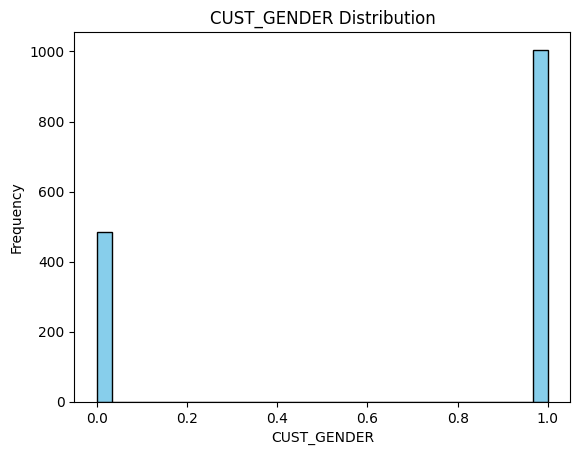

In [46]:
variables = ['CUST_GENDER', 'AGE', 'COUNTRY_NAME',
       'CUST_INCOME_LEVEL', 'EDUCATION', 'HOUSEHOLD_SIZE',
       'YRS_RESIDENCE', 'AFFINITY_CARD', 'BULK_PACK_DISKETTES',
       'FLAT_PANEL_MONITOR', 'HOME_THEATER_PACKAGE', 'BOOKKEEPING_APPLICATION',
       'Y_BOX_GAMES', 'OS_DOC_SET_KANJI']

while True:
    print("Choose a variable to plot: ")
    
    var_choice = int(input("Enter a number: "))
    if var_choice == 0:
        break
    
    var = variables[var_choice-1]
    data = df[var]

    plt.hist(data , bins=30 , color='skyblue' , edgecolor='black')
    plt.title(f"{var} Distribution")
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()
    cont = input("Do you want to continue (yes/no)? ")
    if cont.lower() == 'no':
        break
    